# Introdução

No mercado financeiro altamente competitivo de hoje, reter clientes se tornou tão importante quanto adquirir novos. Bancos e instituições financeiras enfrentam um desafio constante: entender por que seus clientes estão deixando a empresa e o que pode ser feito para evitar essa perda. Identificar os fatores que influenciam o churn — ou seja, a evasão de clientes — é fundamental para desenvolver estratégias de fidelização mais eficazes.



# Contexto

Com base em um conjunto de dados que reúne informações sobre mais de 10 mil clientes de um banco, este projeto propõe uma análise exploratória para investigar quais variáveis mais contribuem para a decisão de um cliente sair da instituição. A base inclui atributos como pontuação de crédito, saldo bancário, número de produtos utilizados, nível de atividade, reclamações e tipo de cartão utilizado — fatores que serão analisados para revelar padrões e tendências que ajudam a explicar o fenômeno do churn bancário.

OU

Este projeto utiliza uma base de dados com informações detalhadas de clientes de um banco, incluindo dados demográficos, comportamento financeiro, uso de produtos e nível de satisfação. Através de análises estatísticas e visualizações, buscamos compreender os principais fatores associados à saída dos clientes, fornecendo insights que possam ajudar a direcionar ações estratégicas para melhorar a retenção e a lealdade dos clientes.

## Importação da base de dados

*Os dados utilizados neste projeto foram obtidos da comunidade Kaggle e estão disponíveis publicamente desde 2022, podendo ser acessados [neste link](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn?resource=download)*

## Bibliotecas


In [234]:
# Tratamento e visualização
import pandas as pd

#Conexão SQL
import sqlite3

# Visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
# O arquivo original está em .csv, vamos transformá-lo em banco de dados para trabalharmos via SQL
caminho = r'C:\Users\pedro\OneDrive\Área de Trabalho\Estudos\Potfólio\ProjetosPython\Analise-de-Credito\Material\Customer-Churn-Records.csv'

#Carregando o csv em um dataframe
df_originalCSV = pd.read_csv(caminho)

#Criando a conexão na memória
conn = sqlite3.connect(':memory:')

#Jogando o DF no banco
df_originalCSV.to_sql('Credito', conn, index=False, if_exists='replace')

df = pd.read_sql('SELECT * FROM Credito', conn)
df

c:\Users\pedro\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


## Entendendo os dados
Com a base importada, vamos entender os dados para fazermos as análises. Mas antes, vamos ver o dicionário das variáveis:

- RowNumber - Corresponde ao número da linha do registro do cliente (sem efeito em nossa análise, droparemos a coluna);
- CustomerId - ID único de cada cliente (sem efeito em nossa análise, droparemos a coluna);
- Surname - Sobrenome do cliente (sem efeito em nossa análise, droparemos a coluna);
- CreditScore - Pontuação de crédito do cliente; 
- Geography - Localização do cliente;
- Gender - Gênero do cliente;
- Age - Idade do cliente;
- Tenure - Tempo de vínculo do cliente ao banco (ótimo indicativo para análise de churn);
- Balance - Saldo do cliente no banco (também um ótimo indicativo)
- NumOfProducts - Número de produtos que o cliente possui em nosso banco;
- HasCrCard - Se o cliente possui ou não cartão de crédito (0 para não e 1 para sim); 
- IsActiveMember - Se o cliente é membro ativo ou não do banco;
- EstimatedSalary - Salário estimado **anual** do cliente;
- Exited - Indica se o cliente saiu ou não do banco (0 para não e 1 para sim);
- Complain - Indica se o cliente fez alguma reclamação do banco (ótimo indicativo para churn - 0 para não e 1 para sim);
- Satisfaction Score - Pontuação de satisfação do banco pelo cliente em pesquisa;
- Card Type - Tipo de cartão que o cliente possui;
- Point Earned - Pontos ganhos pelo cliente ao usar o cartão de crédito do banco.


### Drop das colunas desnecessárias para nossa análise de churn e ajuste de variáveis

In [236]:
# Como nesse projeto estamos utilizadno sqlite3, vamos selecionar as colunas necessárias e não dropar as que não usaremos, devido a limitações do sqlite3. Além disso, como no sqlite3 não podemos usar ALTERTABLE ou RENAME COLUMN, vamos fazer uma nova base de dados com os dados corrigidos


# Criando a nova tabela com nomes de colunas sem espaços
conn.execute('''
CREATE TABLE CreditoCorrigido AS
SELECT
    CreditScore,
    Geography,
    Gender,
    Age,
    Tenure,
    Balance,
    NumOfProducts,
    HasCrCard,
    IsActiveMember,
    EstimatedSalary,
    Exited,
    Complain,
    "Satisfaction Score" AS SatisfactionScore,
    "Card Type" AS CardType,
    "Point Earned" AS PointEarned
FROM Credito
''')

df_corrigido = pd.read_sql('SELECT * FROM CreditoCorrigido', conn)
df_corrigido.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,CardType,PointEarned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


### Análise exploratória Inicial

In [237]:
df_corrigido.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,CardType,PointEarned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [238]:
df_corrigido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Geography          10000 non-null  object 
 2   Gender             10000 non-null  object 
 3   Age                10000 non-null  int64  
 4   Tenure             10000 non-null  int64  
 5   Balance            10000 non-null  float64
 6   NumOfProducts      10000 non-null  int64  
 7   HasCrCard          10000 non-null  int64  
 8   IsActiveMember     10000 non-null  int64  
 9   EstimatedSalary    10000 non-null  float64
 10  Exited             10000 non-null  int64  
 11  Complain           10000 non-null  int64  
 12  SatisfactionScore  10000 non-null  int64  
 13  CardType           10000 non-null  object 
 14  PointEarned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+ MB


In [239]:
df_corrigido.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,PointEarned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [240]:
for col in df_corrigido.columns:
    nulos = df_corrigido[col].isna().sum()
    vazios = (df_corrigido[col] == "").sum()
    duplicados = df_corrigido[col].duplicated().sum()

    print(f'Coluna: {col}')
    print(f'→ Dados nulos (NaN): {nulos}')
    print(f'→ Dados vazios (""): {vazios}')
    print(f'→ Dados duplicados (""): {duplicados}')
    print('-' * 10)

Coluna: CreditScore
→ Dados nulos (NaN): 0
→ Dados vazios (""): 0
→ Dados duplicados (""): 9540
----------
Coluna: Geography
→ Dados nulos (NaN): 0
→ Dados vazios (""): 0
→ Dados duplicados (""): 9997
----------
Coluna: Gender
→ Dados nulos (NaN): 0
→ Dados vazios (""): 0
→ Dados duplicados (""): 9998
----------
Coluna: Age
→ Dados nulos (NaN): 0
→ Dados vazios (""): 0
→ Dados duplicados (""): 9930
----------
Coluna: Tenure
→ Dados nulos (NaN): 0
→ Dados vazios (""): 0
→ Dados duplicados (""): 9989
----------
Coluna: Balance
→ Dados nulos (NaN): 0
→ Dados vazios (""): 0
→ Dados duplicados (""): 3618
----------
Coluna: NumOfProducts
→ Dados nulos (NaN): 0
→ Dados vazios (""): 0
→ Dados duplicados (""): 9996
----------
Coluna: HasCrCard
→ Dados nulos (NaN): 0
→ Dados vazios (""): 0
→ Dados duplicados (""): 9998
----------
Coluna: IsActiveMember
→ Dados nulos (NaN): 0
→ Dados vazios (""): 0
→ Dados duplicados (""): 9998
----------
Coluna: EstimatedSalary
→ Dados nulos (NaN): 0
→ Dados vaz

In [241]:
for col in df_corrigido.columns:
    print(f'Coluna {col}')
    print(df_corrigido[col].unique())
    print(f'- '*10)

Coluna CreditScore
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709

In [242]:
#Vamos separar as colunas filtradas para utilizarmos nas consulta via SQL mais p frente
colunas_utilizadas = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'SatisfactionScore', 'CardType',	'PointEarned']

## Distribuição dos dados
Como nós não temos dados nulos, vazios e, os duplicados não comprometem nossa análise, vamos ver como está a distribuição dos valores em nossas colunas **numéricas**.

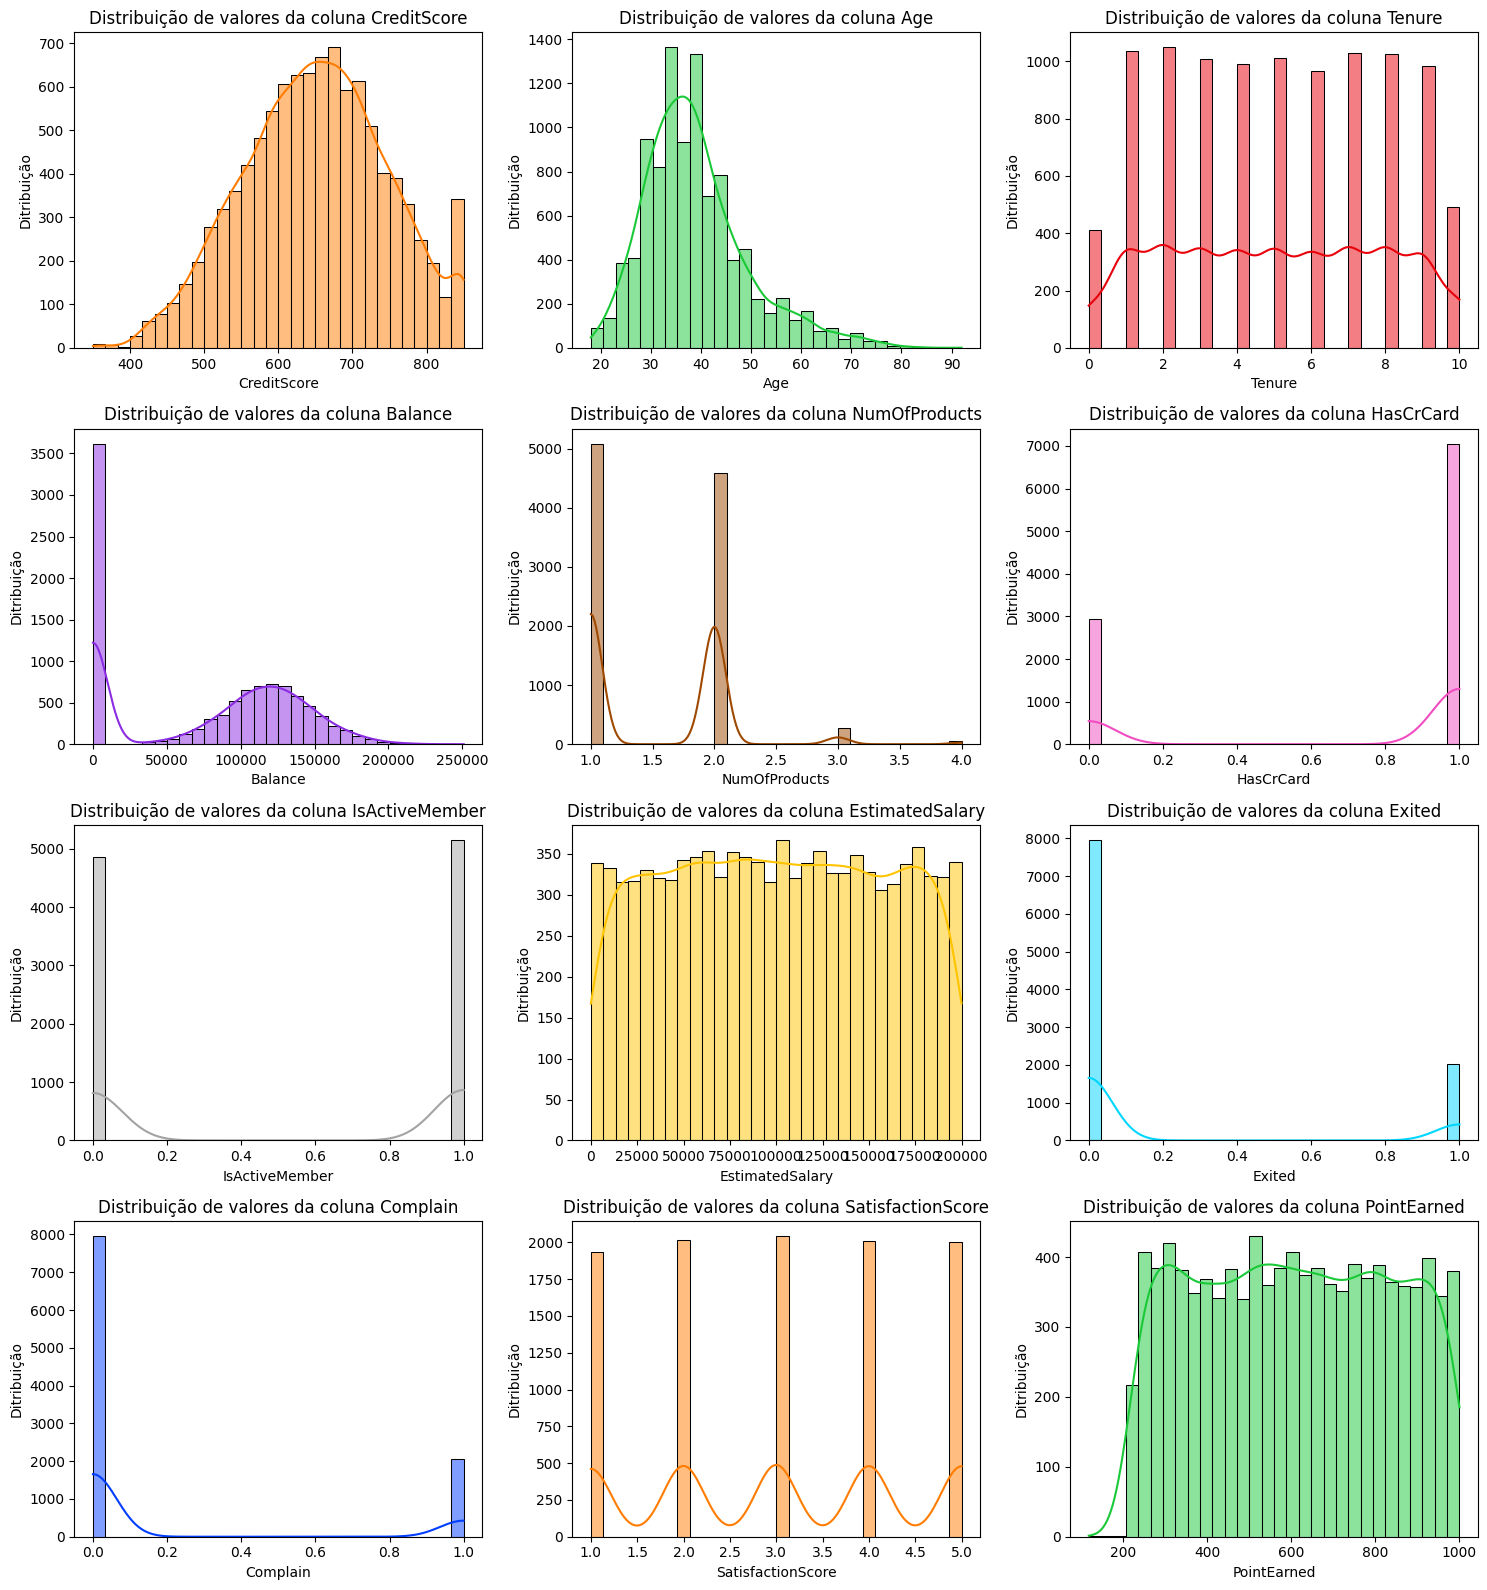

In [243]:
colunas_numericas = df_corrigido.select_dtypes(include='number').columns
total = len(colunas_numericas)

#cores
cores = sns.color_palette('bright')

#Tamanho
n_colunas = 3
n_linhas = (total + 1) // n_colunas
plt.figure(figsize=(n_colunas * 5, n_linhas * 4))

#Histograma
for i, coluna in enumerate(colunas_numericas, 1):
    plt.subplot(n_linhas, n_colunas, i)
    sns.histplot(df_corrigido[coluna], bins=30, kde=True, color=cores[i % len(cores)])
    plt.title(f'Distribuição de valores da coluna {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Ditribuição')

plt.tight_layout()
plt.show()

### Avaliando a distribuição de valores de cada variável independente, podemos concluir inicialmente:

- O score de crédito (ScoreCredit) apresenta uma distribuição normal, com concentração maior entre 600 e 700 pontos, sugerindo que a maioria dos clientes possui uma pontuação de crédito mediana, o que pode indicar baixo risco, mas também nos dá espaço para estratégias de fidelização.
- A idade dos clientes (Age) é assimétrica à direita, com maior concentração na faixa entre 30 e 45 anos, o que sugere oportunidades para estratégias de marketing e fidelização direcionadas a esse perfil.
- O tempo de vínculo de nossos clientes (Tenure) apresenta uma distribuição uniforme, indicando que a base de clientes é bem distribuída ao longo dos anos de permanência. O ponto-chave dessa variável é identificar em que momento ocorre a maior evasão de clientes, aspecto que será aprofundado posteriormente na análise.
- No saldo dos clientes (Balance), há uma concentração relevante (e preocupante) de saldos zerados, o que nos alerta para possíveis churns no futuro. Além destes, o saldo é seguido por uma cauda à direita de clientes com saldo elevado, sugerindo a existência de distintos perfis em nossa base — entre clientes inativos ou c pouco engajamento e outros com maior potencial financeiro.
- No número de produtos (NumOfProducts), a maioria dos clientes possui 0 ou 1, com poucos utilizando 3 ou mais. Pode indicar uma oportunidade de venda cruzada de novos produtos, sejam eles de crédito, seguros ou serviços complementares.
- As variáveis *HasCrCard, IsActiveMember, Exited e Complain* são binárias, podendo ser analisadas uma a uma. Vamos a elas:
    - **HasCrCard** - Cerca de 70% de nossa base possui cartão de crédito, o que abre margem para fidelização via crédito entre 30% do todo.
    - **IsActiveMember** - Cerca de 50% da nossa base **NÃO** está ativa, o que gera um grande alerta. Precisamos entender os motivos da inatividade e criar estratégias para reengajar esses clientes.
    - **Exited** - Somente 20% dos clientes nunca saíram do banco.Temos uma alta rotatividade, mas há indícios de retorno por parte de alguns. É essencial investigar os fatores que levam ao abandono e o que motiva o retorno.
    - **Complain** - A grande maioria dos clientes nunca fez alguma reclamação do nosso banco ou serviços (quase 80%), o que mostra uma percepção positiva geral do banco. Ainda assim é necessário entender os casos de insatisfação para melhoria contínua.
- No salário estimado (EstimatedSalary), nos é apresentado uma distribuição uniforme, sugerindo boa diversidade no perfil de renda dos clientes.
- A satisfação com nosso banco (Satisfaction Score) apresenta uma distribuição equilibrada, sem predominância de notas altas ou baixas.
- A distribuição de pontos (Point Earned) está bem espalhada, com leve concentração nas faixas mais elevadas, indicando que os clientes mais engajados estão sendo recompensados.

### Com os dados compreendidos e suas distribuições analisadas, vamos explorar alguns cenários para um entendimento completo / Vamos para as análises ARRUMAR

# Situações (Arrumar ou apagar)

1. Entendimento dos Perfis e Distribuição da Base de Clientes
- **Objetivo**: Consolidar os três perfis identificados (Ativos, Inativos e Evadidos) com base em variáveis comportamentais, financeiras e de relacionamento.
- **Insight esperado**: Observar o quanto cada grupo representa da base total (completando os 10 mil clientes) e fornecer um panorama claro para ações direcionadas por time (Marketing, CRM, Produtos e Relacionamento).


2. Riscos de Evasão no Grupo Ativo e Inativo
- **Objetivo**: Identificar sinais de churn nos clientes ainda na base, principalmente entre os inativos e parte dos ativos com engajamento baixo.
- **Variáveis-chave**: Exited, Age, Tenure, Balance, IsActiveMember, SatisfactionScore, Complain.
- **Insight esperado**: Antecipar comportamentos semelhantes aos dos evadidos para criação de campanhas de retenção preventivas.


3. Potencial de Cross-Selling entre Ativos Engajados
- **Objetivo**: Encontrar clientes ativos com maior abertura para aquisição de novos produtos (seguros, crédito, investimentos).
- **Variáveis-chave**: NumOfProducts, EstimatedSalary, ScoreCredit, PointEarned, IsActiveMember.
- **Insight esperado**: Criar segmentações inteligentes para campanhas de upsell e cross-sell, especialmente entre os mais satisfeitos e engajados.


4. Oportunidades de Reativação entre Inativos
- **Objetivo**: Mapear quais perfis inativos demonstram potencial financeiro ou histórico de engajamento que justifique esforços de reativação.
- **Variáveis-chave**: NumOfProducts, EstimatedSalary, ScoreCredit, PointEarned, SatisfactionScore.
- **Insight esperado**: Priorizar os inativos de maior valor para ações de CRM e relacionamento personalizado.
 ofertas.


5. Diagnóstico Final: Potencial Financeiro vs. Engajamento
- **Objetivo**: Detectar clientes subaproveitados — com boa renda ou saldo, mas baixo relacionamento.
- **Variáveis-chave**: Balance, EstimatedSalary, NumOfProducts, IsActiveMember, PointEarned.
- **Insight esperado**: Identificar alvos prioritários para campanhas de ativação ou expansão do relacionamento.

1. Entendimento dos Perfis e Distribuição da Base de Clientes
- **Objetivo**: Consolidar os três perfis identificados (Ativos, Inativos e Evadidos) com base em variáveis comportamentais, financeiras e de relacionamento.
- **Insight esperado**: Observar o quanto cada grupo representa da base total (completando os 10 mil clientes) e fornecer um panorama claro para ações direcionadas por time (Marketing, CRM, Produtos e Relacionamento).


### Perfil dos clientes que saíram

Para iniciar nossa análise, é essencial compreendermos tanto o perfil geral dos clientes quantos o perfil daqueles que optaram por encerrar suas contas com o banco. Entender fatores como idade, renda, tempo de relacionamento, score e outros indicadores nos permitirá traçar estratégias melhores de retenção. 

Para isso, os clientes serão segmentados em três grupos distintos com base nos dados abaixo que falam sobre os clientes que saíram do banco e dos que estão com as contas ativas ou não.

![alt text](clientesEvadidosXMembrosAtivos.png)

Com base nisso, os grupos serão:

- **Grupo Ativo** - Clientes atualmente ativos 
- **Grupo Inativo** - Clientes que possuem a conta, mas sem movimentações recentes.
- **Grupo Evadido (churn)** - Clientes que encerraram suas contas.

#### 🟩 | Grupo Ativo 

*Clientes com conta ativa e movimentação recente. Representam o público engajado da base e são prioritários para estratégias de manutenção e fidelização.*

In [244]:
# Para isso, vamos filtrar os clientes em uma query contendo aqueles que não saíram de nosso banco, mas que também estão com as contas ativas.
query = f'''
SELECT {", ".join(colunas_utilizadas)} 
FROM CreditoCorrigido
WHERE Exited = 0 AND IsActiveMember = 1
'''

df_ativos = pd.read_sql(query, conn)
df_ativos

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,CardType,PointEarned
0,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
1,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
2,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
3,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
4,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4411,602,Germany,Male,35,7,90602.42,2,1,1,51695.41,0,1,3,GOLD,764
4412,673,Germany,Male,47,1,183579.54,2,0,1,34047.54,0,0,5,PLATINUM,772
4413,606,Spain,Male,30,8,180307.73,2,1,1,1914.41,0,0,3,SILVER,567
4414,841,Spain,Male,28,4,0.00,2,1,1,179436.60,0,0,5,GOLD,393


In [245]:
df_ativos.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,PointEarned
count,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.0,4416.000000,4416.0,4416.000000,4416.000000,4416.000000
mean,654.213542,38.963995,4.957201,73304.717314,1.535779,0.707654,1.0,99253.061793,0.0,0.001359,3.030797,607.028306
std,95.145008,11.765771,2.891661,62486.761557,0.511332,0.454892,0.0,57391.253792,0.0,0.036840,1.405523,226.011166
min,405.000000,18.000000,0.000000,0.000000,1.000000,0.000000,1.0,90.070000,0.0,0.000000,1.000000,206.000000
25%,588.750000,31.000000,2.000000,0.000000,1.000000,0.000000,1.0,50781.767500,0.0,0.000000,2.000000,410.000000
50%,656.000000,37.000000,5.000000,92212.200000,2.000000,1.000000,1.0,98947.335000,0.0,0.000000,3.000000,605.000000
75%,719.000000,43.000000,7.000000,125912.632500,2.000000,1.000000,1.0,148182.365000,0.0,0.000000,4.000000,802.250000
max,850.000000,92.000000,10.000000,212778.200000,3.000000,1.000000,1.0,199953.330000,0.0,1.000000,5.000000,1000.000000


##### Perfil do Grupo Ativo

- Perfil Geral: Clientes com idade média de 39 anos e score de crédito médio de 654, indicando um perfil relativamente jovem e com certos riscos financeiros.
- Saldo: Média de renda de R$  92 mil/ano e 25% com saldo zerado — possível sinal de pouco engajamento em parte da base, apesar do alto potencial financeiro médio.
- Produtos: A maioria possui 2 produtos, e praticamente todos têm cartão de crédito.
- Satisfação e Pontuação: Média de satisfação em 3 (neutra) e pontuação média acumulada em 607 — indício de envolvimento moderado e possibilidade de fidelização com estímulo certo.

#### 🟨 | Grupo Inativo 

*Clientes com conta aberta, mas sem movimentações recentes. Indicam potencial risco de evasão e requerem ações de reativação.*

In [246]:
# Para os inativos, vamos filtra-los em uma query contendo aqueles que não cancalaram suas contas, mas que não a movimentam mais.
query = '''
SELECT *
FROM CreditoCorrigido
WHERE Exited = 0 AND IsActiveMember = 0
'''

df_inativos = pd.read_sql(query, conn)
df_inativos

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,CardType,PointEarned
0,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
1,528,France,Male,31,6,102016.72,2,0,0,80181.12,0,0,3,GOLD,264
2,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0,0,3,GOLD,249
3,476,France,Female,34,10,0.00,2,1,0,26260.98,0,0,3,SILVER,119
4,549,France,Female,25,5,0.00,2,0,0,190857.79,0,0,3,PLATINUM,549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0,0,5,SILVER,560
3542,644,France,Male,28,7,155060.41,1,1,0,29179.52,0,0,5,DIAMOND,715
3543,800,France,Female,29,2,0.00,2,0,0,167773.55,0,0,4,PLATINUM,311
3544,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300


In [247]:
df_inativos.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,PointEarned
count,3546.000000,3546.000000,3546.000000,3546.000000,3546.00000,3546.000000,3546.0,3546.000000,3546.0,3546.000000,3546.000000,3546.000000
mean,648.879301,35.470389,5.126904,72042.907253,1.55471,0.706430,0.0,100316.887713,0.0,0.001128,3.001974,607.063734
std,96.206721,7.147319,2.864150,63304.809293,0.50718,0.455462,0.0,57413.419717,0.0,0.033572,1.410317,226.223788
min,408.000000,18.000000,0.000000,0.000000,1.00000,0.000000,0.0,96.270000,0.0,0.000000,1.000000,119.000000
25%,582.250000,31.000000,3.000000,0.000000,1.00000,0.000000,0.0,50956.250000,0.0,0.000000,2.000000,414.000000
50%,650.000000,35.000000,5.000000,91776.980000,2.00000,1.000000,0.0,100145.565000,0.0,0.000000,3.000000,602.000000
75%,716.000000,40.000000,8.000000,127059.967500,2.00000,1.000000,0.0,148809.445000,0.0,0.000000,4.000000,800.000000
max,850.000000,77.000000,10.000000,221532.800000,3.00000,1.000000,0.0,199992.480000,0.0,1.000000,5.000000,1000.000000


##### Perfil do Grupo Inativo

- Perfil Geral: Idade média de 35 anos e score médio de 648 — perfil jovem e financeiramente arriscado.
- Saldo: Renda média de R$ 100 mil/ano e com 25% dos clientes com saldo zerado — apesar da renda maior do que os clientes ativos, temos 1/4 dos clientes com saldo zerado.
- Produtos: Em geral, 1 produto ativo; muitos mantêm apenas vínculo básico.
- Satisfação e Pontuação: Satisfação média de 3 — percepção de desempenho médio do banco; foco deve ser em reativação com ofertas segmentadas.

#### 🟥 | Grupo Evadido (churn) 

*Clientes que encerraram suas contas. São analisados para identificação de padrões de evasão e suporte à construção de estratégias preventivas.*

In [248]:
# Para os Evadidos, vamos filtrá-los por uma query que contenha aqueles que cancelaram suas contas.
query = '''
SELECT *
FROM CreditoCorrigido
WHERE Exited = 1
'''
df_evadidos = pd.read_sql(query, conn)
df_evadidos

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,CardType,PointEarned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
2,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
3,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
4,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,0,2,SILVER,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1,1,3,GOLD,790
2034,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1,1,4,GOLD,591
2035,597,France,Female,53,4,88381.21,1,1,0,69384.71,1,1,3,GOLD,369
2036,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564


In [249]:
df_evadidos.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,PointEarned
count,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.0,2038.000000,2038.000000,2038.000000
mean,645.414622,44.835623,4.934740,91109.476006,1.475466,0.699215,0.360648,101509.908783,1.0,0.998037,2.997547,604.448479
std,100.337351,9.759754,2.936768,58346.483197,0.801408,0.458712,0.480306,57932.623392,0.0,0.044270,1.399381,225.315301
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,1.0,0.000000,1.000000,163.000000
25%,578.000000,38.000000,2.000000,38591.222500,1.000000,0.000000,0.000000,51924.020000,1.0,1.000000,2.000000,405.000000
50%,646.000000,45.000000,5.000000,109344.230000,1.000000,1.000000,0.000000,102489.335000,1.0,1.000000,3.000000,610.500000
75%,716.000000,51.000000,8.000000,131423.637500,2.000000,1.000000,1.000000,152443.857500,1.0,1.000000,4.000000,793.000000
max,850.000000,84.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000,1.0,1.000000,5.000000,1000.000000


#### Perfil do Grupo Evadido 

- Perfil Geral: Idade média de 45 anos e score médio de 645 —  perfil mais maduro, mas com tendência à instabilidade ou descontentamento com o serviço.
- Saldo: Renda média de R$ 100 mil/ano e saldo médio de R$ 91 mil. Um público com renda e saíndo de nosso banco (perda de clientes valiosos).
- Produtos: Média de 1,47 produtos, geralmente com cartão de crédito (70% possuem) e presença mínima de produtos adicionais.
- Satisfação e Pontuação: Satisfação média neutra de 3 — Aqui é interessante notar a taxa de Complain que está em praticamente todos os ex-clientes (99,8% de média), precisamos entender se as reclamações desses clientes foram atendidas ou não.

### Conclusões dos Perfis

Com a separação clara entre os grupos **Ativo, Inativo e Evadido**, foi possível mapear o perfil completo dos 10 mil clientes da base, divididos da seguinte forma:

- Grupo Ativo: 4.036 clientes
- Grupo Inativo: 3.926 clientes
- Grupo Evadido: 2.038 clientes

Cada grupo apresenta comportamentos, níveis de engajamento e potenciais distintos:

- O **Grupo Ativo** representa o público com maior presença de produtos, uso constante e **potencial de fidelização** — mas ainda com uma parcela significativa com saldo zerado, o que aponta para **oportunidades de engajamento**.
- O **Grupo Inativo** concentra clientes mais jovens, com boa renda, mas que mantêm relacionamento básico e desativaram parcialmente sua movimentação — um **perfil ideal para ações de reativação com ofertas personalizadas**.
- Já o **Grupo Evadido**, com média de idade mais alta e saldo financeiro elevado, representa uma **perda direta de clientes valiosos** — agravada por um **volume altíssimo de reclamações (99,8%)**, o que reforça a importância de ações de retenção e pós-venda mais eficazes.

Essa segmentação permite uma visão estratégica mais precisa, direcionando o trabalho dos times de marketing, CRM, produtos e relacionamento, com abordagens específicas para cada grupo com base no seu nível de engajamento e valor potencial.

---

### Riscos de Evasão no Grupo Ativo e Inativo
- **Objetivo**: Identificar sinais de churn nos clientes ainda na base, principalmente entre os inativos e parte dos ativos com engajamento baixo.
- **Variáveis-chave**: CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, SatisfactionScore, Complain e PointEarned.
- **Insight esperado**: Antecipar comportamentos semelhantes aos dos evadidos para criação de campanhas de retenção preventivas.

Para analisar os riscos de evasão entre os grupos Ativo e Inativo, vamos utilizar as variáveis *CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, SatisfactionScore, Complain e PointEarned*, comparando seus padrões com os do grupo Evadido.\
A partir dessa análise comparativa, vamos **identificar clientes com sinais moderados ou fortes de evasão**. Com isso, segmentaremos os ativos e inativos em dois subgrupos:

- Um com alguns indicativos de churn, que merece atenção e acompanhamento;
- Outro com fortes evidências de que irão encerrar a conta, demandando ações imediatas de retenção.

Essa abordagem nos permitirá priorizar campanhas preventivas com base no grau de risco de cada cliente, otimizando os esforços de relacionamento e fidelização.

In [ ]:
lista_risco_evasao = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'SatisfactionScore', 'Complain', 'PointEarned']


df_ativos_risco_evasao = df_ativos[lista_risco_evasao]
df_inativos_risco_evasao = df_inativos[lista_risco_evasao]
df_evadidos_risco_evasao = df_evadidos[lista_risco_evasao]

print("### Grupo Evadido")
display(df_evadidos_risco_evasao.head())

print("\n### Grupo Ativo")
display(df_ativos_risco_evasao.head())

print("\n### Grupo Inativo")
display(df_inativos_risco_evasao.head())

SyntaxError: invalid syntax (924853367.py, line 1)

#### Com os grupos separados e as colunas relevantes selecionadas, o próximo passo é identificar quantos perfis dos grupos Ativo e Inativo apresentam características semelhantes às dos clientes Evadidos.

In [ ]:
# Exemplo de condição com base em padrões dos evadidos
condicoes_de_risco = (
    (df_ativos_risco_evasao['Satisfaction Score'] <= 3) &
    (df_ativos_risco_evasao['IsActiveMember'] == 1) &
    (df_ativos_risco_evasao['Complain'] == 1)
)

ativos_com_risco = df_ativos_risco_evasao[condicoes_de_risco]
print(f"Ativos com perfil de risco semelhante ao dos evadidos: {ativos_com_risco.shape[0]}")

# Mesmo para os inativos
inativos_com_risco = df_inativos_risco_evasao[condicoes_de_risco]
print(f"Inativos com perfil de risco semelhante ao dos evadidos: {inativos_com_risco.shape[0]}")


Ativos com perfil de risco semelhante ao dos evadidos: 5
Inativos com perfil de risco semelhante ao dos evadidos: 3


C:\Users\pedro\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == "":


# Análises

# Resultados

# Finalização